# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 17.09.2019

Мягкий дедлайн: 23:59MSK 29.09.2019 (за каждый день просрочки снимается 2 балла)

Жесткий дедлайн: 23:59MSK 02.10.2019

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а также привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. 

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: xx.

<strong style="color: red">Внимание!</strong> В этом ноутбуке используется библиотека `ipyleaflet`. Чтобы ее установить так, чтобы она работала, нужно совершить 2 простых шага:

In [ ]:
%%bash
pip3 install ipyleaflet
jupyter nbextension enable --py --sys-prefix ipyleaflet

После этого перезапустите сессию (не `Restart Kernel`, а нажмите `Ctrl+C` в терминале, где вы запускали ноутбук, и запустите заново). Лучше это сделать сразу, чтобы потом не пришлось прерывать сессию и терять промежуточные результаты работы. Если все сделано правильно, вы должны увидеть карту Москвы, выполнив ячейку ниже:

In [1]:
from ipyleaflet import Map, basemaps
Map(center=(55.7522200, 37.6155600), zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

Map(center=[55.75222, 37.61556], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
%matplotlib inline

sns.set(style="darkgrid")

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [3]:
df = pd.read_csv("../data/taxi_train.csv")

In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [6]:
df['pickup_datetime'].head(1)

0    2016-03-14 17:24:55
Name: pickup_datetime, dtype: object

Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [7]:
df.drop(['dropoff_datetime'], axis=1, inplace=True)

In [8]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Разбейте выборку на обучающую и тестовую в отношении 7:3.

In [9]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

<AxesSubplot:>

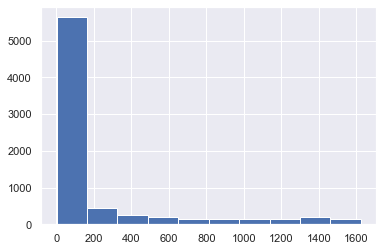

In [10]:
df['trip_duration'].value_counts().hist()

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений? 
1. Логнормальное распределение

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?
1.  Думаю, что они знали о данных и знали вид распределения. И поэтому выбрали именно эту метрику.

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашим выборкам колонки `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке:

In [11]:
df['log_trip_duration'] = np.log1p(df['trip_duration'])

In [12]:
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.122493
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.498282
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661527
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6.063785
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435,6.077642


<AxesSubplot:>

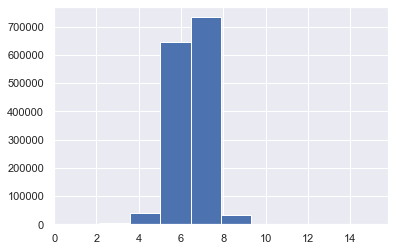

In [13]:
df['log_trip_duration'].hist()

In [14]:
train, test, y_train, y_test = train_test_split(df, df['trip_duration'], random_state=17, test_size=0.3)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [15]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [16]:
best_constant = train['log_trip_duration'].mean()
print("Train RMSE with best constant = %.4f" % rmse(train['log_trip_duration'], best_constant))

Train RMSE with best constant = 0.7956


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [17]:
train['month']= train['pickup_datetime'].dt.month
train['dayweek']= train['pickup_datetime'].dt.dayofweek
train['hour'] = train['pickup_datetime'].dt.hour
train['dayyear']= train['pickup_datetime'].dt.dayofyear
tr = train.groupby(['month', 'hour']).size().to_frame()

In [18]:
train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration',
       'log_trip_duration', 'month', 'dayweek', 'hour', 'dayyear'],
      dtype='object')

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков стоит рассматривать как категориальные, а какие - как численные? Почему?

<AxesSubplot:xlabel='pickup_datetime', ylabel='count'>

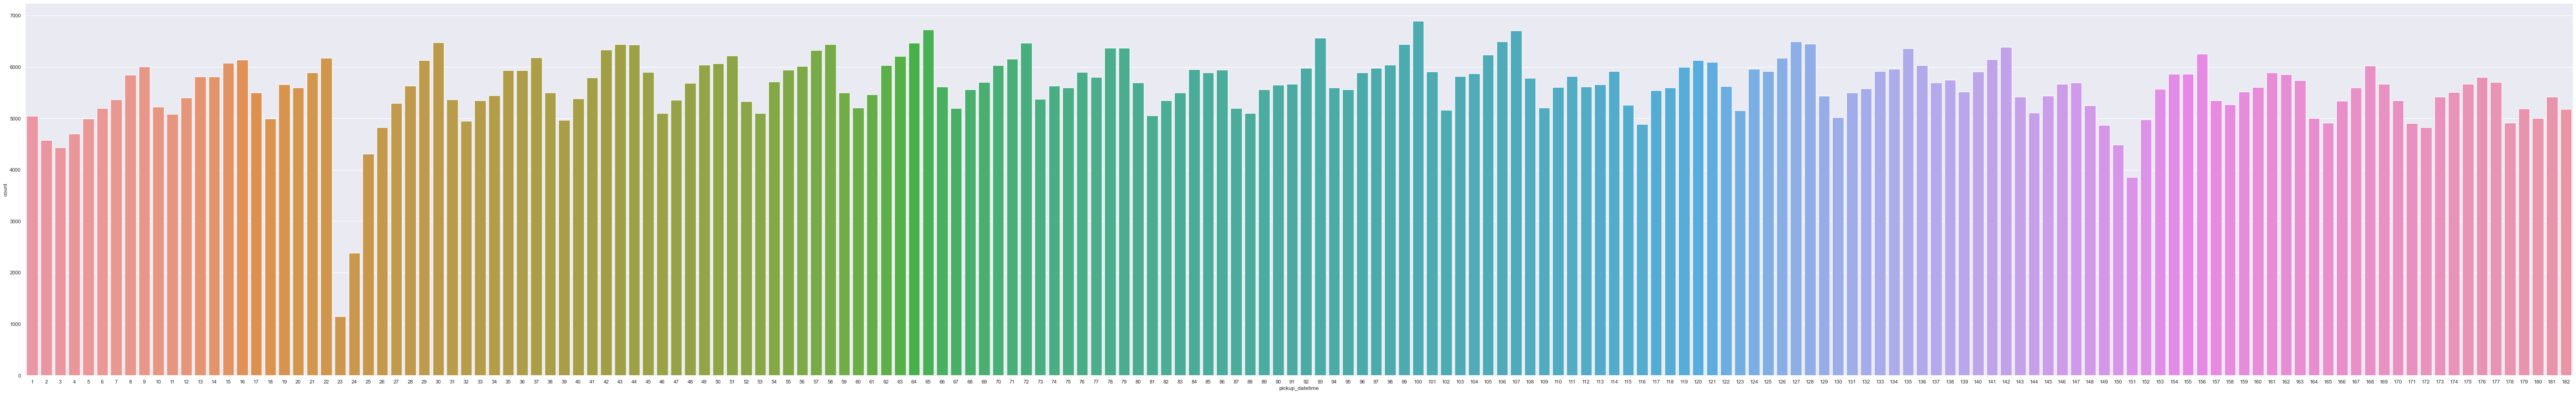

In [19]:
plt.figure(figsize=(100,15))
sns.countplot(x = train['pickup_datetime'].dt.dayofyear)

In [20]:
train.groupby('dayyear')[['pickup_datetime']].count().sort_values('pickup_datetime').head(2)
# запретили движение в NY

,pickup_datetime
dayyear,
23,1146
24,2381


In [21]:
train[train['dayyear'] == 23].head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,month,dayweek,hour,dayyear
1021650,id2416300,1,2016-01-23 10:24:37,2,-73.985870,40.758640,-73.975410,40.755989,N,460,6.133398,1,5,10,23
481854,id2089230,1,2016-01-23 00:17:18,1,-73.956779,40.770672,-73.967033,40.763489,N,287,5.662960,1,5,0,23
1140360,id1775226,2,2016-01-23 03:25:50,6,-73.989540,40.720470,-73.977142,40.743210,N,597,6.393591,1,5,3,23
1182967,id1782512,2,2016-01-23 04:28:47,1,-73.992828,40.742771,-73.968063,40.610008,N,2789,7.933797,1,5,4,23
147522,id2437383,2,2016-01-23 01:40:29,2,-73.999413,40.719643,-74.002159,40.726646,N,333,5.811141,1,5,1,23


**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.
1. Такси не могли ездить в эти дни из за запрета движения.

Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

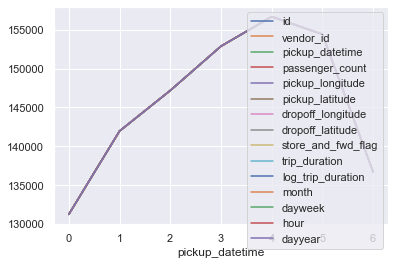

In [22]:
week_df = train.groupby(train['pickup_datetime'].dt.dayofweek).count().plot()

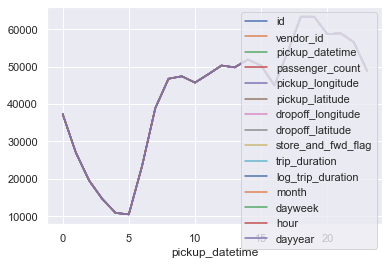

In [23]:
time_df = train.groupby(train['pickup_datetime'].dt.hour).count().plot()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

In [24]:
pd.unique(train['month'])

array([3, 2, 6, 4, 1, 5], dtype=int64)

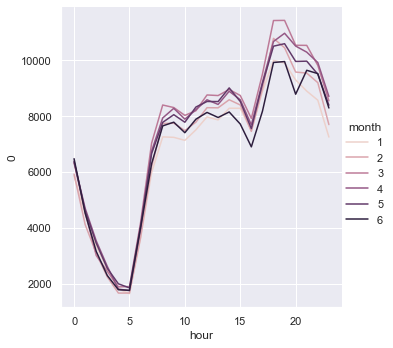

In [25]:
sns.relplot(data=tr, y=0, x='hour', hue='month', kind="line");

In [26]:
tr1 = train.groupby(['dayweek', 'hour']).size().to_frame()

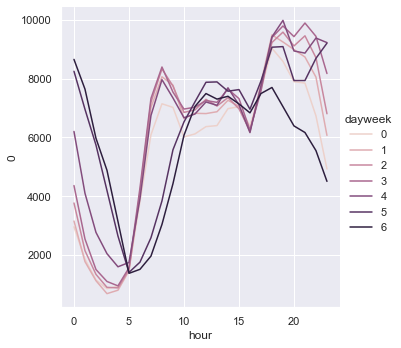

In [27]:
sns.relplot(data=tr1, y=0, x='hour', hue='dayweek', kind="line");

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?
1. Наблюдается спад активности в ночные и утренние часы, что обусловлено временем биологической активности.
2. Также видно, что в выходные такси используются реже, чем в будние.
3. В 3 месяц значительно вырос спрос на такси.

**Задание 4 (0.5 баллов)**. По *обучающей выборке* нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [28]:
log_day = train.groupby('dayweek')[['log_trip_duration']].mean()
log_day.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='dayweek')

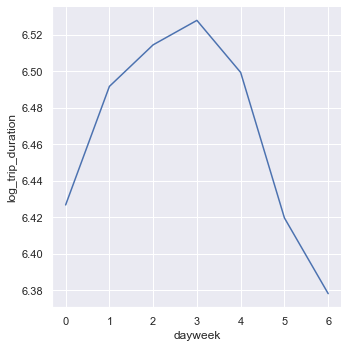

In [29]:
sns.relplot(data = train.groupby('dayweek')[['log_trip_duration']].mean(), y='log_trip_duration', x='dayweek', kind='line')

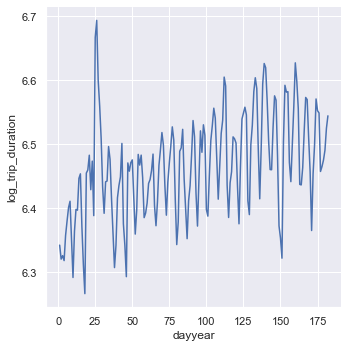

In [30]:
sns.relplot(data = train.groupby('dayyear')[['log_trip_duration']].mean(), y='log_trip_duration', x='dayyear', kind='line')

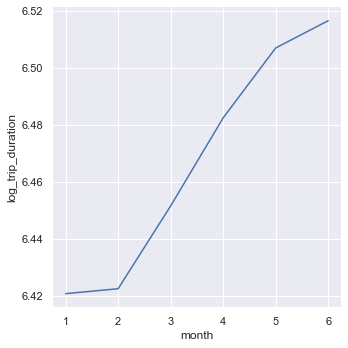

In [31]:
sns.relplot(data = train.groupby('month')[['log_trip_duration']].mean(), y='log_trip_duration', x='month', kind='line')

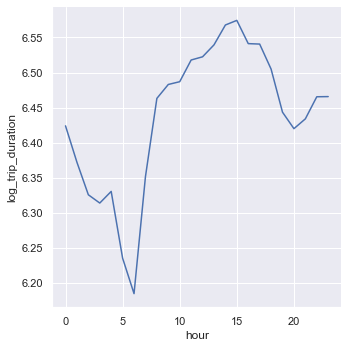

In [32]:
sns.relplot(data = train.groupby('hour')[['log_trip_duration']].mean(), y='log_trip_duration', x='hour', kind='line')

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [33]:
df = pd.read_csv("../data/taxi_train.csv")

In [34]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['log_trip_duration'] = np.log1p(df['trip_duration'])
df['month']= df['pickup_datetime'].dt.month
df['dayweek']= df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour
df['dayyear']= df['pickup_datetime'].dt.dayofyear
# df = pd.concat([df, pd.get_dummies(df['vendor_id'], prefix='vendor_id')], axis = 1)

In [35]:
drop_list = ['id','dropoff_datetime']
[df.drop(x, axis=1, inplace=True) for x in drop_list]

[None, None]

In [36]:
df['anomal1']= np.where(df['pickup_datetime'].dt.dayofyear==23, True, False)
df['anomal2']= np.where(df['pickup_datetime'].dt.dayofyear==24, True, False)
df['dayofYear'] = df['pickup_datetime'].dt.dayofyear

In [37]:
train, test, y_train, y_test = train_test_split(df, df['log_trip_duration'], random_state=17, test_size=0.3)

In [38]:
X_train = train[['month','dayweek','hour','anomal1','anomal2','dayofYear']]
X_test = test[['month','dayweek','hour','anomal1','anomal2','dayofYear']]

## Пример масок

In [39]:
categorical = list(X_train.dtypes[X_train.dtypes == "object"].index)
numeric_data = X_train.select_dtypes([np.number])

In [40]:
scaling_list = list(X_train.dtypes[X_train.dtypes == "int64"].index)

In [41]:
scaling_list

['month', 'dayweek', 'hour', 'dayofYear']

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore"), categorical),
    ('scaling', StandardScaler(), numeric_data.columns)
])

pipeline = Pipeline(steps=[
    ('ohe_and_scaling', column_transformer),
    ('regression', Ridge())
])

model = pipeline.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
# на сколько в среднем не угадал по времени
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))
print("Test RMSE = %.4f" % (rmse(y_test, y_pred)))

Train RMSE = 0.7938
Test RMSE = 0.7945


In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[scaling_list])
X_test_scaled = scaler.transform(X_test[scaling_list])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

Test RMSE = 0.7945
Train RMSE = 0.7938


Best alpha = 10000.0000


Text(0, 0.5, 'CV score')

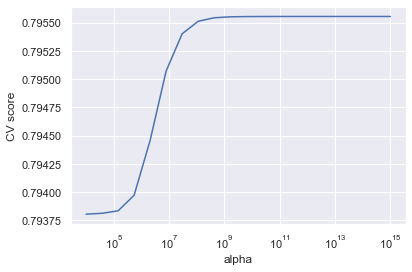

In [44]:
from sklearn.model_selection import GridSearchCV

alphas = np.logspace(4, 15, 20)
searcher = GridSearchCV(Ridge(), [{"alpha": alphas}], scoring=rmse_scorer, cv=10, n_jobs=-1)
searcher.fit(X_train_scaled, y_train)

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

plt.plot(alphas, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

In [45]:
simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[scaling_list], y_train)
y_pred = model.predict(X_test[scaling_list])
print("Test RMSE = %.4f" % rmse(y_test, y_pred))

Test RMSE = 0.7945


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [46]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps

In [47]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)
    result_map.add_layer(circles_layer)

    return result_map

In [48]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

Map(center=[40.75119249725342, -73.97159385681152], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [49]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.749976352691654, -73.97257236480714], controls=(ZoomControl(options=['position', 'zoom_in_text'…

**Вопрос**: Какие две точки выделяются на карте?
1. аэропорты

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [50]:
from haversine import haversine
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку:

In [51]:
train['haversine'] = haversine_array(train['pickup_latitude'].values, train['pickup_longitude'].values, train['dropoff_latitude'].values, train['dropoff_longitude'].values)

In [52]:
train['log_haversine'] = np.log1p(train['haversine'])
train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration,month,dayweek,hour,dayyear,anomal1,anomal2,dayofYear,haversine,log_haversine
568705,2,2016-03-10 07:17:45,1,-73.990158,40.714840,-74.006248,40.742142,N,1023,6.931472,3,3,7,70,False,False,70,3.324836,1.464374
1236526,1,2016-02-03 06:08:38,1,-73.978714,40.762054,-73.789879,40.643223,N,2381,7.775696,2,2,6,34,False,False,34,20.687868,3.076753
585709,2,2016-03-27 18:33:30,1,-73.986473,40.722439,-74.004929,40.731419,N,546,6.304449,3,6,18,87,False,False,87,1.848137,1.046665
799191,1,2016-06-15 17:03:27,2,-73.978996,40.762161,-73.973755,40.790520,N,1409,7.251345,6,2,17,167,False,False,167,3.184053,1.431280
341671,1,2016-06-21 12:53:33,2,-73.998291,40.722824,-73.993118,40.730179,N,963,6.871091,6,1,12,173,False,False,173,0.926722,0.655820


Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [53]:
cor = train[['haversine','log_haversine']]

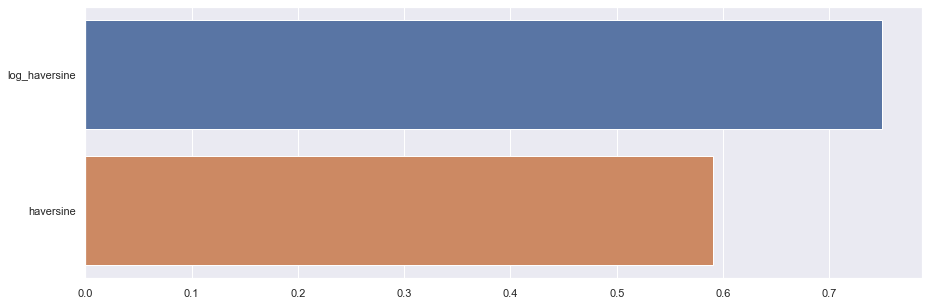

In [54]:
correlations = cor.corrwith(y_train).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 5)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [55]:
train['v_avg'] = train['log_haversine']/y_train

<AxesSubplot:>

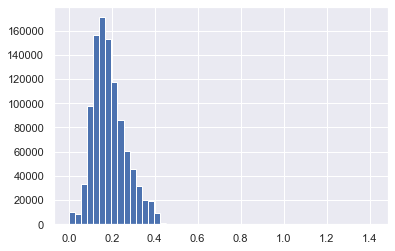

In [56]:
train['v_avg'].hist(bins=50)

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

In [57]:
train['v_avg'].quantile(q=0.95)

0.33789194620342256

<AxesSubplot:>

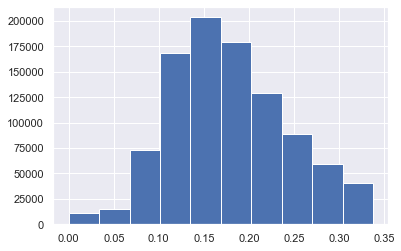

In [58]:
train[train['v_avg'] < train['v_avg'].quantile(q=0.95)]['v_avg'].hist()

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

In [59]:
tmp = train.groupby(['dayweek','hour'])[['v_avg']].median()
tmp

v_avg
dayweek hour          
0       0     0.224151
        1     0.221652
        2     0.222804
        3     0.226934
        4     0.250940
...                ...
6       19    0.179908
        20    0.185853
        21    0.192660
        22    0.201795
        23    0.212036

[168 rows x 1 columns]

In [60]:
tmp.sort_values(by='v_avg')

v_avg
dayweek hour          
2       12    0.153841
3       12    0.154137
1       12    0.155022
        9     0.155268
2       13    0.155310
...                ...
6       5     0.235340
3       4     0.238505
5       5     0.238833
1       4     0.243195
0       4     0.250940

[168 rows x 1 columns]

<AxesSubplot:ylabel='dayweek-hour'>

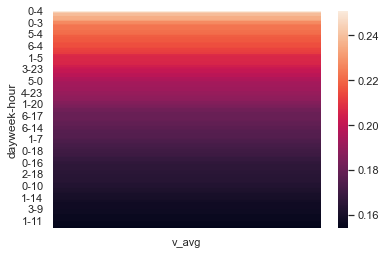

In [61]:
sns.heatmap(tmp.sort_values(by='v_avg',ascending=False))

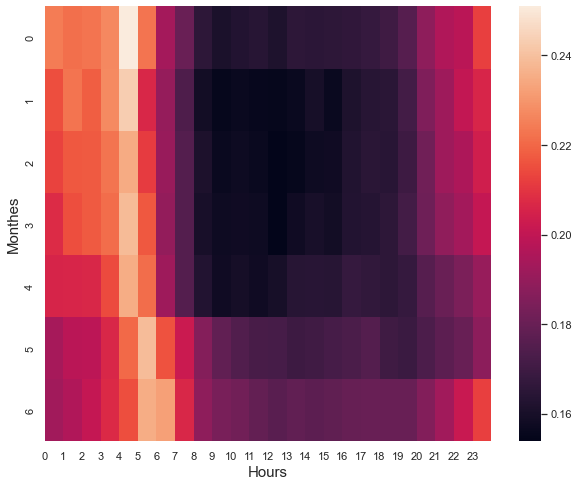

In [62]:
speed_for_week_hour = np.ndarray((7,24))

for i in range(0,7):
    for j in range(0,24):
        speed_for_week_hour[i][j] = tmp.loc[i].loc[j].values[0]

_, ax = plt.subplots(figsize=(10,8))
sns.heatmap(speed_for_week_hour, ax=ax)
plt.xlabel('Hours', fontsize = 15)
plt.xticks(np.arange(0,24, 1), np.arange(0,24, 1))
plt.ylabel('Monthes', fontsize = 15);

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?
1. Скорость линейно связана с другими признаками.

In [63]:
train=train.drop(['v_avg'],axis=1)

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [64]:
mask = (train['month'] < 4) & (train['hour'] < 14) & (train['month'] > 0) & (train['hour'] > 11)

In [65]:
train['trip_bad_traffic'] = mask.apply(lambda x: 0 if (x==False) else 1)

In [66]:
train['trip_good_traffic'] = (((train['month'] == 0) | (train['month'] == 3)) & (train['hour'] == 4)).apply(lambda x: 0 if (x==False) else 1)

**Задание 8 (0.25 балла)**. Как уже было замечено выше, на карте выделяются две точки - аэропорты La Guardia и John F Kennedy. Для каждого из аэропортов добавьте в выборки два признака: началась ли поездка из этого аэропорта и закончилась ли поездка в этом аэропорту.

In [67]:
try_to_catch_airoport = df.sample(100)

In [68]:
show_circles_on_map(try_to_catch_airoport.iloc[0:100,:], "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.75461215972901, -73.97700668334961], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [69]:
airoport1_1 = try_to_catch_airoport.iloc[30:31,:]

In [70]:
airoport1 = try_to_catch_airoport.iloc[66:67,:]

In [71]:
airoport1['dropoff_latitude'], airoport1_1['dropoff_latitude'], airoport1['dropoff_longitude'], airoport1_1['dropoff_longitude'],

(1246996    40.762569
 Name: dropoff_latitude, dtype: float64,
 637434    40.725872
 Name: dropoff_latitude, dtype: float64,
 1246996   -73.994507
 Name: dropoff_longitude, dtype: float64,
 637434   -73.996635
 Name: dropoff_longitude, dtype: float64)

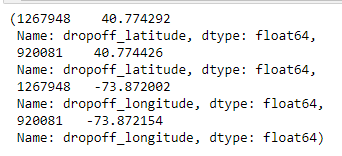 Точки ~ верхнего аэропорта

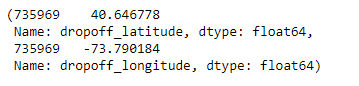 Точки нижнего аэропорта

In [72]:
air_1 = df[((df['dropoff_latitude'] < 40.78) & (df['dropoff_latitude'] > 40.77)) & ((df['dropoff_longitude'] < -73.85) & (df['dropoff_longitude'] > -73.89))]
air_1 = air_1.sample(100)

In [73]:
show_circles_on_map(air_1, "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.77315586090088, -73.87080139160156], controls=(ZoomControl(options=['position', 'zoom_in_text',…

In [74]:
air_2 = df[((df['dropoff_latitude'] < 40.67) & (df['dropoff_latitude'] > 40.63)) & ((df['dropoff_longitude'] < -73.77) & (df['dropoff_longitude'] > -73.82))]
air_2 = air_2.sample(100)

In [75]:
show_circles_on_map(air_2, "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.646515922546385, -73.78633796691895], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [76]:
mask = ((df['dropoff_latitude'] < 40.67) & (df['dropoff_latitude'] > 40.63)) & ((df['dropoff_longitude'] < -73.77) & (df['dropoff_longitude'] > -73.82))

In [77]:
train['air_2'] = mask.apply(lambda x: 0 if (x==False) else 1)

In [78]:
mask = ((df['dropoff_latitude'] < 40.78) & (df['dropoff_latitude'] > 40.77)) & ((df['dropoff_longitude'] < -73.85) & (df['dropoff_longitude'] > -73.89))

In [80]:
train['air_1'] = mask.apply(lambda x: 0 if (x==False) else 1)

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<AxesSubplot:xlabel='log_trip_duration'>

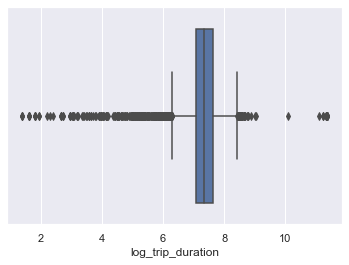

In [81]:
sns.boxplot(x = train[train['air_1'] == 1]['log_trip_duration'])

In [86]:
train[train['air_1'] == 1]['log_trip_duration'].median(), train[train['air_1'] == 0]['log_trip_duration'].median()

(7.349230824613334, 6.489204931325317)

<AxesSubplot:xlabel='log_trip_duration'>

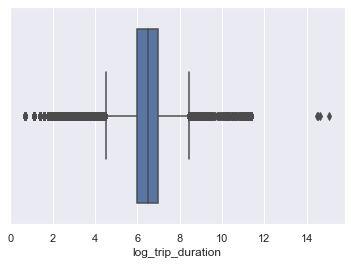

In [82]:
sns.boxplot(x = train[train['air_1'] == 0]['log_trip_duration'])

<AxesSubplot:xlabel='log_trip_duration'>

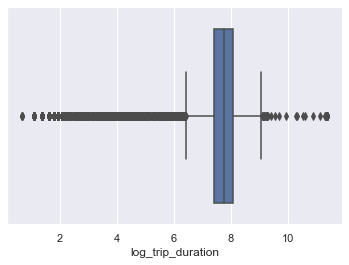

In [83]:
sns.boxplot(x = train[train['air_2'] == 1]['log_trip_duration'])

<AxesSubplot:xlabel='log_trip_duration'>

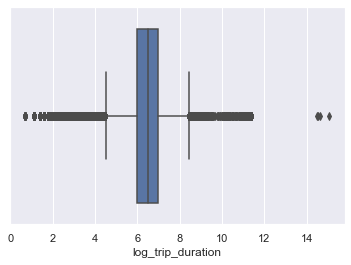

In [84]:
sns.boxplot(x = train[train['air_2'] == 0]['log_trip_duration'])

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?
1. Скорее да, чем нет. Поездки из аэропорта длятся  на порядок дольше и туда совершается мало коротких поездок. Это было интуитивно понятно, но теперь есть признаки, которые это разделяют. Для однозначного ответа нужно провести эксперимент. 

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

In [89]:
from ipyleaflet import Map, Circle, LayerGroup, basemaps, Polygon

In [248]:
5 % 3

2

In [264]:
main_grid = [[40.701314, -74.018608],[40.701314, -73.941241],
          [40.791438, -73.941241],[40.791438, -74.018608]]
n_squeres = 3
latitude_step = (-main_grid[0][1] + main_grid[1][1])/n_squeres
longitude_step = (-main_grid[0][0] + main_grid[2][0])/n_squeres
little_grids = []
matrix = []
matrix.append(main_grid[0])
for i in range(n_squeres+1):
    for j in range(n_squeres+1):
        matrix.append([matrix[0][0]+i*longitude_step,matrix[0][1]+j*latitude_step])
matrix.pop(0)
iteration = 0
for i in range(n_squeres**2+2):
    iteration += 1
    if (iteration % 4 == 0):
        continue  
    little_grids.append([matrix[i],matrix[i+1],matrix[i+5],matrix[i+4]])

In [263]:
little_grids2 = []
little_grids2.append([matrix[0],matrix[1],matrix[5],matrix[4]])
little_grids2.append([matrix[1],matrix[2],matrix[6],matrix[5]])
little_grids2.append([matrix[2],matrix[3],matrix[7],matrix[6]])
little_grids2.append([matrix[4],matrix[5],matrix[9],matrix[8]])
little_grids2.append([matrix[5],matrix[6],matrix[10],matrix[9]])
little_grids2.append([matrix[6],matrix[7],matrix[11],matrix[10]])
little_grids2.append([matrix[8],matrix[9],matrix[13],matrix[12]])
little_grids2.append([matrix[9],matrix[10],matrix[14],matrix[13]])
little_grids2.append([matrix[10],matrix[11],matrix[15],matrix[14]])
little_grids2

In [304]:
def make_polygons():
    main_grid = [[40.701314, -74.018608],[40.701314, -73.941241],
          [40.791438, -73.941241],[40.791438, -74.018608]]
    n_squeres = 9
    latitude_step = (-main_grid[0][1] + main_grid[1][1])/n_squeres
    longitude_step = (-main_grid[0][0] + main_grid[2][0])/n_squeres
    little_grids = []
    matrix = []
    matrix.append(main_grid[0])
    for i in range(n_squeres+1):
        for j in range(n_squeres+1):
            matrix.append([matrix[0][0]+i*longitude_step,matrix[0][1]+j*latitude_step])
    matrix.pop(0)
    iteration = 0
    add_nodes = n_squeres + 2
    for i in range(n_squeres**2+n_squeres-1):
        iteration += 1
        if (iteration % (n_squeres+1) == 0):
            continue  
        little_grids.append([matrix[i],matrix[i+1],matrix[i+add_nodes],matrix[i+add_nodes-1]])
    poly_main = Polygon(locations=main_grid, color="green", fill_color="green")
    poly_add =  Polygon(locations=little_grids, color="red", fill_color="red")  
    
    return poly_main, poly_add

In [305]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    center = (data[latitude_column].mean(), data[longitude_column].mean())
    result_map = Map(center=center, zoom=10, basemap=basemaps.Esri.NatGeoWorldMap)

    circles = []
    for _, row in data.iterrows():
        circles.append(Circle(
            location=(row[latitude_column], row[longitude_column]),
            fill_color=color,
            fill_opacity=0.2,
            radius=300,
            stroke=False
        ))
    circles_layer = LayerGroup(layers=circles)

    poly_main, poly_add = make_polygons()
    result_map.add_layer(poly_main)
    result_map.add_layer(poly_add)
    result_map.add_layer(circles_layer)

    return result_map

In [306]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

Map(center=[40.750886512756345, -73.97428550720215], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [129]:
from sklearn.base import BaseEstimator, TransformerMixin

class MapGridTransformer(BaseEstimator, TransformerMixin):
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

IndentationError: expected an indented block (4038650922.py, line 4)

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, численные признаки отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты: с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите обучающую выборку от них.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Попробуйте объединить редкие категории в одну. Естественно, делать это нужно только для действительно редких категорий.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Стало ли лучше?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Разбейте обучающую выборку на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальное значение параметра регуляризации (по логарифмической сетке), на тестовой выборке измерьте качество полученной модели.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Для каждого перебранного `alpha` посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими редкими парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Переобучите модель на новых даннных и посчитайте качество на тестовой выборке

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.